# Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1 : Load the Data

In [2]:
#Load Dataset
abn = pd.read_csv('airbnb.csv')
abn.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
#Melihat Ukuran Data
print(abn.size)
print(abn.shape)

782320
(48895, 16)


# Step 2 : Data Checking

<h3>[ Data Type Check ]</h3>

In [4]:
abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Terlihat kejanggalan last_review berisi data Tanggal, namun typenya object
#Converting object to datetime
abn['last_review'] = pd.to_datetime(abn.last_review)
abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

<h3>[ Missing Value Check ]</h3>

In [6]:
#Mencari nilai Null
abnListNull = abn.isnull().sum().sort_values(ascending = False)
abnListNull

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

<h6>(Fixing : "host_name")</h6>

In [7]:
# Check Hostname Kosong
abn_hostname = abn[abn["host_name"].isnull()]
abn_hostname

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaT,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaT,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [8]:
#Coba Cek apakah missing value memiliki dupikasi data pada host_id sehingga bisa kita ganti datanya
for i in abn_hostname["host_id"]:
    cek_host = abn.loc[abn["host_id"] == i, ["host_name"]]
    print(cek_host)

    host_name
360       NaN
     host_name
2700       NaN
     host_name
5745       NaN
     host_name
6075       NaN
     host_name
6582       NaN
     host_name
8163       NaN
8852       NaN
     host_name
8257       NaN
     host_name
8163       NaN
8852       NaN
     host_name
9138       NaN
     host_name
9817       NaN
      host_name
14040       NaN
      host_name
14631       NaN
      host_name
15174       NaN
      host_name
19565       NaN
      host_name
27777       NaN
      host_name
27962       NaN
28042       NaN
28274       NaN
      host_name
27962       NaN
28042       NaN
28274       NaN
      host_name
27962       NaN
28042       NaN
28274       NaN
      host_name
30570       NaN
      host_name
32193       NaN
      host_name
38992       NaN


In [9]:
#Karena data tidak ada kesamaan, Drop Rows dengan name yang memiliki missing value
abn_remove1 = abn.dropna(subset=['name'])
abn_remove1.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10042
last_review                       10042
host_name                            21
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
name                                  0
id                                    0
dtype: int64

In [10]:
#Drop Rows dengan host name missing
abn_remove2 = abn_remove1.dropna(subset=['host_name'])
abn_remove2.isnull().sum().sort_values(ascending = False)

reviews_per_month                 10037
last_review                       10037
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_name                             0
host_id                               0
name                                  0
id                                    0
dtype: int64

<h6>(Remove Unused Column)</h6>

In [11]:
abn_remove2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
#Drop 2 Kolom yang tidak digunakan
abn_remove2 = abn_remove2.drop(['host_id','name'], axis=1)
abn_remove2.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<h6>(Filling the Null)</h6>

<b><u>Filling Last Review with Most Common Date</u></b>

In [13]:
abn_remove2.loc[:, ('last_review')] = abn_remove2.loc[:, ('last_review')].fillna(abn_remove2.loc[:, ('last_review')].mode()[0])
abn_remove2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   host_name                       48858 non-null  object        
 2   neighbourhood_group             48858 non-null  object        
 3   neighbourhood                   48858 non-null  object        
 4   latitude                        48858 non-null  float64       
 5   longitude                       48858 non-null  float64       
 6   room_type                       48858 non-null  object        
 7   price                           48858 non-null  int64         
 8   minimum_nights                  48858 non-null  int64         
 9   number_of_reviews               48858 non-null  int64         
 10  last_review                     48858 non-null  datetime64[ns]
 11  re

In [14]:
abn_remove2.head()

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,NaN,1,365
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<b>Filling / imputation review per month dengan Mean, based on category tertentu (splitting Class) :</b>

In [15]:
#Splitting class menggunakan mean dari keunikan tipe kamar
abn_remove2['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
#Imputation dengan Splitting Class
for i in abn_remove2['room_type'].unique():
    #Nilai mean per class
    mean_cat = abn_remove2.loc[abn_remove2["room_type"] == i, ('reviews_per_month')].mean()
    #Assign nilai mean, ke Null data di setiap class
    abn_remove2.loc[abn_remove2["room_type"] == i, ('reviews_per_month')] = abn_remove2.loc[abn_remove2["room_type"] == i, ('reviews_per_month')].fillna(mean_cat)

In [17]:
abn_remove2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   host_name                       48858 non-null  object        
 2   neighbourhood_group             48858 non-null  object        
 3   neighbourhood                   48858 non-null  object        
 4   latitude                        48858 non-null  float64       
 5   longitude                       48858 non-null  float64       
 6   room_type                       48858 non-null  object        
 7   price                           48858 non-null  int64         
 8   minimum_nights                  48858 non-null  int64         
 9   number_of_reviews               48858 non-null  int64         
 10  last_review                     48858 non-null  datetime64[ns]
 11  re

<h3>[ Unexpected Value Check ]</h3>

In [18]:
abnv = abn_remove2

In [19]:
#Melihat Keunikan sebaran data
for i in abnv:
    abnx = abnv[i].sort_values().unique()
    print('------------------------------------------')
    print(i)
    print(abnx)
    print('------------------------------------------')

------------------------------------------
id
[    2539     2595     3647 ... 36485431 36485609 36487245]
------------------------------------------
------------------------------------------
host_name
["'Cil" '(Ari) HENRY LEE' '(Email hidden by Airbnb)' ... '소정' '진' '현선']
------------------------------------------
------------------------------------------
neighbourhood_group
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
------------------------------------------
------------------------------------------
neighbourhood
['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Garden

<blockquote>
<b><u>Hasil Pengamatan :</u></b> <br>
id : tidak ada keanehan <br>
host_name: tidak ada keanehan <br>
neighbourhood_group: tidak ada keanehan <br> 
neighbourhood: tidak ada keanehan <br> 
latitude: tidak ada keanehan <br>
longitude: tidak ada keanehan <br>
room_type: tidak ada keanehan <br>
<b><i>price: Ada empty price = 0 (Coupon? Promo?) > Perlu di Cek</i></b><br>
<b><i>minimum_nights: 1250 night? mungkin sewa tahunan (kalkulasi ke 3,4 tahun) > Perlu di Cek </i></b><br>
<b>number_of_reviews: Ada empty review (nilai 0) </b><br>
last_review: tidak ada keanehan <br>
reviews_per_month: tidak ada keanehan <br>
calculated_host_listings_count: tidak ada keanehan <br>
<b>availability_365: availabity =0? </b><br>
</blockquote>

<h6>(Fixing : "price")</h6>

In [20]:
#Melihat Kesamaan data dengan price = 0 tapi memiliki waktu free lebih dari 1 hari
#Asumsi free coupon biasanya berupa potongan harga atau hanya 1 hari
abn_price = abnv.loc[(abnv["price"] < 1) & (abnv["minimum_nights"] > 1), :]
abn_price

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.050000,4,28
25433,20333471,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127
25634,20523843,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.710000,5,0
25753,20608117,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.530000,2,0
25778,20624541,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.150000,1,73
26259,20933849,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2019-06-23,1.306712,1,0
26841,21291569,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.110000,6,333
26866,21304320,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.260000,6,139


In [21]:
abn_price.shape

(8, 14)

In [22]:
abnv.shape

(48858, 14)

In [23]:
#Hapus 8 Data yang abnormal (Memiliki Price 0, tapi jumlah nightsnya lebih dari 1 malam)
abnv.drop(abnv[(abnv["price"] < 1) & (abnv["minimum_nights"] > 1)].index, inplace = True)
abnv.shape

(48850, 14)

<blockquote>Kesimpulan : kemungkinan promo karena price = 0, dari keseluruhan data hanya stay 1 night, Untuk price 0 dengan durasi diatas 1 hari telah <b>dihapus dengan total 8 baris</b></blockquote>

<h6>(Fixing : "minimum_nights")</h6>

In [24]:
#Check kemungkinan sewa tahunan diatas seminggu
abn_overstay = abnv.loc[abnv["minimum_nights"] > 7, :]
abn_overstay["minimum_nights"].value_counts().sort_index(ascending=False).head(10)

1250     1
999      3
500      5
480      1
400      1
370      1
366      1
365     29
364      1
360      5
Name: minimum_nights, dtype: int64

![](abnb_desc.png)

<blockquote>Kesimpulan : Terlihat dari data, banyak yang overstay, namun ternyata AirBnB menyewakan tahunan untuk Property-nya : <b>Do Nothing</b></blockquote>

# Step 3 : Data Addition & Review

In [25]:
abna = abnv

In [26]:
abna['price'] = pd.to_numeric(abna['price'])
abna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48850 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48850 non-null  int64         
 1   host_name                       48850 non-null  object        
 2   neighbourhood_group             48850 non-null  object        
 3   neighbourhood                   48850 non-null  object        
 4   latitude                        48850 non-null  float64       
 5   longitude                       48850 non-null  float64       
 6   room_type                       48850 non-null  object        
 7   price                           48850 non-null  int64         
 8   minimum_nights                  48850 non-null  int64         
 9   number_of_reviews               48850 non-null  int64         
 10  last_review                     48850 non-null  datetime64[ns]
 11  re

In [27]:
#category based on the price: Cheap (<50), Medium (50-99), and Expensive(>100)
abna["price_cat"] = np.where(abna["price"] < 50, "Cheap", np.where(abna["price"] < 100, "Medium","Expensive" ) )
abna

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
0,2539,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Expensive
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.445075,1,365,Expensive
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,5022,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.445075,2,9,Medium
48891,36485057,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.445075,2,36,Cheap
48892,36485431,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.306712,1,27,Expensive
48893,36485609,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.471726,6,2,Medium


In [28]:
#Filter all data which has last_review in >2019
abnb = abna.loc[abna["last_review"] > '2018-12-31', :]
abnb

,id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_cat
1,2595,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,3647,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.445075,1,365,Expensive
3,3831,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
5,5099,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Expensive
7,5178,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.445075,2,9,Medium
48891,36485057,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.445075,2,36,Cheap
48892,36485431,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.306712,1,27,Expensive
48893,36485609,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.471726,6,2,Medium


In [29]:
#Showing Amount of Data & Show Max-Min Price
abna.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885000e+04,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000,48850.000000
mean,1.902310e+07,40.728942,-73.952174,152.765322,7.011996,23.274985,1.373905,7.148946,112.805568
std,1.098377e+07,0.054529,0.046161,240.244103,20.020803,44.552760,1.498217,32.967259,131.614248
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475226e+06,40.690080,-73.983078,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.968806e+07,40.723070,-73.955685,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915815e+07,40.763110,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Step 4 : Visualize Data

<h2>Peningkatan User Review</h2>
Menghitung Peningkatan Jumlah Review di setiap tahunnya

In [30]:
growth = abna['last_review'].groupby([abna['last_review'].dt.year.rename('year')]).agg({'count'})
year = np.sort(abna['last_review'].dt.year.rename('year').unique())

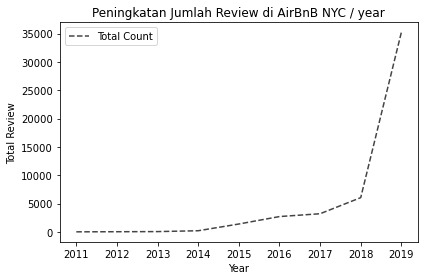

,count
year,
2011,7
2012,25
2013,48
2014,199
2015,1388
2016,2703
2017,3202
2018,6045
2019,35233


In [31]:
#Peningkatan User di AirBnB
plt.plot(year, growth, color='#444444',linestyle='--', label='Total Count')

plt.title('Peningkatan Jumlah Review di AirBnB NYC / year')
plt.xlabel('Year')
plt.ylabel('Total Review')

plt.legend()
plt.tight_layout()
plt.show()

growth

<h2>Tipe Room in 2019</h2>
Menghitung Jumlah Tipe Room di Masing-masing Neighboorhood Group Pada Tahun 2019

In [32]:
rooms = abnb['room_type'].groupby([abnb['neighbourhood_group'],abnb['room_type']]).count()

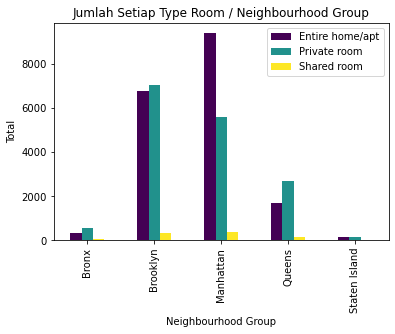

neighbourhood_group  room_type      
Bronx                Entire home/apt     330
                     Private room        531
                     Shared room          49
Brooklyn             Entire home/apt    6759
                     Private room       7042
                     Shared room         310
Manhattan            Entire home/apt    9396
                     Private room       5568
                     Shared room         375
Queens               Entire home/apt    1689
                     Private room       2700
                     Shared room         158
Staten Island        Entire home/apt     159
                     Private room        161
                     Shared room           6
Name: room_type, dtype: int64

In [33]:
groups = abnb.groupby(['neighbourhood_group','room_type']).size().unstack(fill_value=0)
groups.plot.bar( cmap='viridis')

plt.title('Jumlah Setiap Type Room / Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total')

plt.legend()
plt.show()

rooms

<h2>Jumlah Property di Setiap Kategori Harga</h2>
Melihat Jumlah Property di setiap Kategori Harga yang telah ditentukan

In [34]:
roomprc = abnb['price_cat'].groupby([abnb['price_cat']]).count()

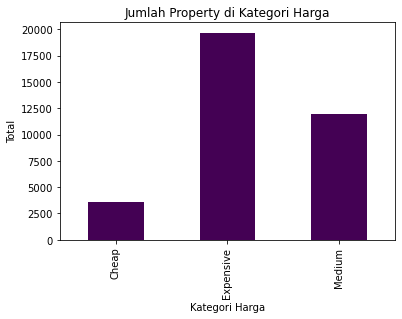

price_cat
Cheap         3602
Expensive    19676
Medium       11955
Name: price_cat, dtype: int64

In [35]:
groups = abnb.groupby(['price_cat']).size()
groups.plot.bar( cmap='viridis')

plt.title('Jumlah Property di Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Total')

plt.show()

roomprc

# NYC Neighbourhood Map

![](nyc-ngh.gif)
<b><center>Terdapat 5 area Neighbourhood di NYC, yang akan digunakan untuk review secara geografis</center></b>

<h3>Referensi Longitude & Latitude dari NYC :</h3>
https://en.wikipedia.org/wiki/Module:Location_map/data/USA_New_York_City <br/>
Top    : 40.92 <br/>
Bottom : 40.49 <br/>
Left   : -74.27 <br/>
Right  : -73.68 <br/>

In [36]:
plt.style.use('seaborn')

In [37]:
#Data Count Untuk digunakan dalam pengolahan data visual, Group by neighbourhood
map_ngh_count = abnb.groupby(['neighbourhood']).count().sort_values(by='neighbourhood', ascending=True)

In [38]:
#Data Mean Untuk digunakan dalam pengolahan data visual, Group by neighbourhood
map_ngh_mean = abnb.groupby(['neighbourhood']).mean().sort_values(by='neighbourhood', ascending=True)

<h2>Jumlah Review @ Neighbourhood in 2019</h2>
Melihat Total Review di Setiap Neighbourhood & Neighbourhood Group

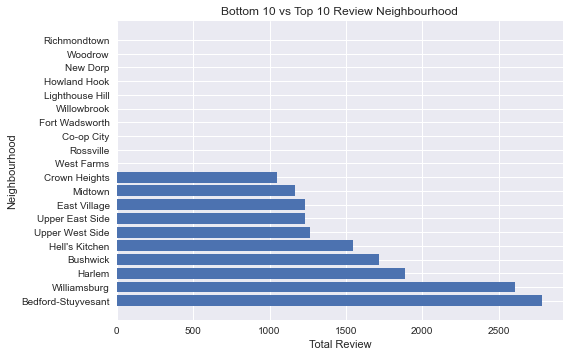

In [39]:
#Menampilkan Top 10 Jumlah Review di Setiap Neighbourhood
ngh_counttp10 = abnb.groupby(['neighbourhood']).count().sort_values(by='number_of_reviews', ascending=False).head(10)
ngh_countbt10 = abnb.groupby(['neighbourhood']).count().sort_values(by='number_of_reviews', ascending=False).tail(10)
plt.barh(ngh_counttp10.index, ngh_counttp10['number_of_reviews'])
plt.barh(ngh_countbt10.index, ngh_countbt10['number_of_reviews'])

plt.title('Bottom 10 vs Top 10 Review Neighbourhood')
plt.xlabel('Total Review')
plt.ylabel('Neighbourhood')

plt.show()

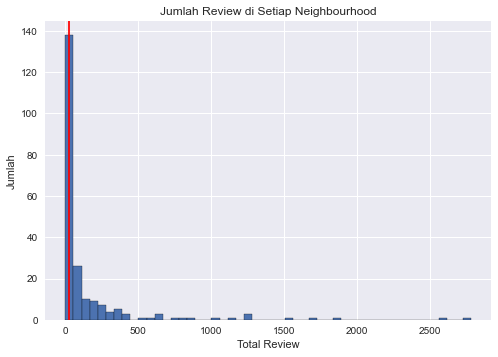

27.0

In [40]:
#Menampilkan Histogram Jumlah Review di Setiap Neighbourhood
plt.hist(map_ngh_count['number_of_reviews'], bins = 50, edgecolor='k')
plt.axvline(map_ngh_count['number_of_reviews'].median(), color='r') # add median

plt.title('Jumlah Review di Setiap Neighbourhood')
plt.xlabel('Total Review')
plt.ylabel('Jumlah')

plt.show()
map_ngh_count['number_of_reviews'].median()

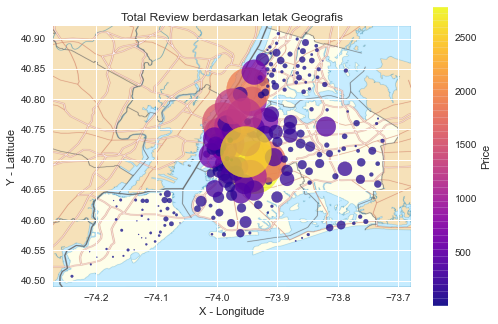

In [41]:
#Load Images
#URL : https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG
nyc = plt.imread('USA_New_York_City_location_map.png', 0)
plt.imshow(nyc, zorder=0, extent=[-74.27, -73.68, 40.49,40.92])
ax = plt.gca()

#Scatter
x = map_ngh_mean['longitude']
y = map_ngh_mean['latitude']

mapc = map_ngh_count['number_of_reviews']

plt.title('Total Review berdasarkan letak Geografis')
plt.xlabel('X - Longitude')
plt.ylabel('Y - Latitude')

plt.scatter(x, y, s=mapc, c=mapc, cmap='plasma', alpha=0.75)

cbar= plt.colorbar()
cbar.set_label('Price')


plt.show()

<h2>Rata-Rata Harga Sewa @ Neighbourhood in 2019</h2>
Melihat Tingkat Rata-rata harga sewa di setiap daerah, untuk melihat daerah mana yang memiliki rata-rata sewa tinggi

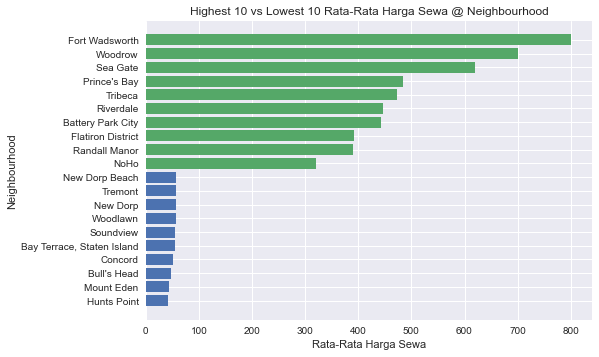

In [42]:
#Menampilkan Top 10 Rata-Rata Harga Sewa di Setiap Neighbourhood
ngh_meantp10 = abnb.groupby(['neighbourhood']).mean().sort_values(by='price', ascending=True).head(10)
ngh_meanbt10 = abnb.groupby(['neighbourhood']).mean().sort_values(by='price', ascending=True).tail(10)
plt.barh(ngh_meantp10.index, ngh_meantp10['price'])
plt.barh(ngh_meanbt10.index, ngh_meanbt10['price'])

plt.title('Highest 10 vs Lowest 10 Rata-Rata Harga Sewa @ Neighbourhood')
plt.xlabel('Rata-Rata Harga Sewa')
plt.ylabel('Neighbourhood')

plt.show()

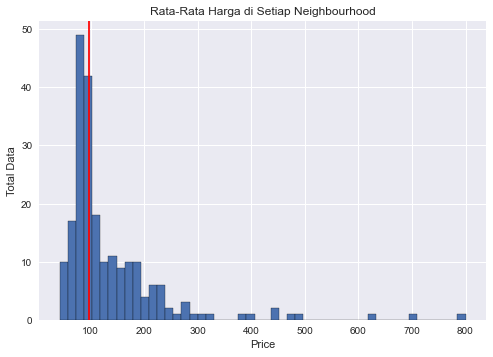

97.42857142857143

In [43]:
#Menampilkan Histogram Rata-rata harga Sewa di Setiap Neighbourhood
plt.hist(map_ngh_mean['price'], bins = 50, edgecolor='k')
plt.axvline(map_ngh_mean['price'].median(), color='r') # add median

plt.title('Rata-Rata Harga di Setiap Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Total Data')

plt.show()
map_ngh_mean['price'].median()

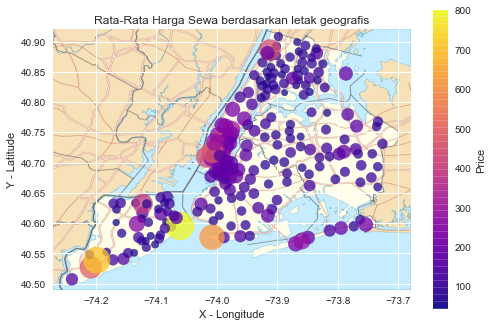

In [44]:
#Menampilkan persebaran data harga sewa secara gografis
#URL : https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG
nyc = plt.imread('USA_New_York_City_location_map.png', 0)
plt.imshow(nyc, zorder=0, extent=[-74.27, -73.68, 40.49,40.92])
ax = plt.gca()

#Scatter
x = map_ngh_mean['longitude']
y = map_ngh_mean['latitude']

mapm = map_ngh_mean['price']

plt.title('Rata-Rata Harga Sewa berdasarkan letak geografis')
plt.xlabel('X - Longitude')
plt.ylabel('Y - Latitude')

plt.scatter(x, y, s=mapm, c=mapm, cmap='plasma', alpha=0.75)

cbar= plt.colorbar()
cbar.set_label('Price')


plt.show()

<h2>Hubungan Harga Sewa & Jumlah Review</h2>
Melihat Hubungan Antara Tingkat Rata-rata harga sewa di setiap daerah, dengan Jumlah Review

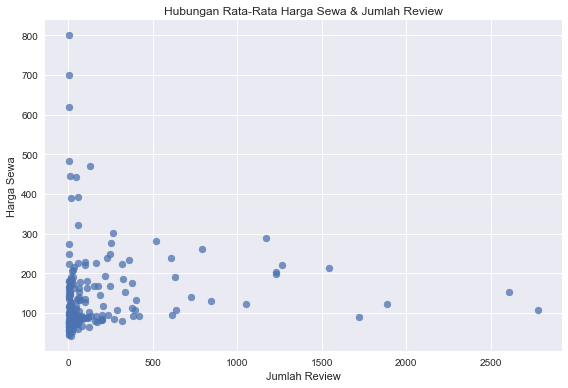

In [45]:
# Add Color Bar
plt.scatter(mapc, mapm,cmap='plasma', alpha=0.75)

plt.title('Hubungan Rata-Rata Harga Sewa & Jumlah Review')
plt.xlabel('Jumlah Review')
plt.ylabel('Harga Sewa')

plt.tight_layout()
plt.show()